# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

This notebook is an AI-generated example for exploring Dandiset 001366, version 0.250324.1603. It has not been fully verified, and users should exercise caution when interpreting the code or results.

## Dandiset Overview

This Dandiset contains movies of a pial vessel of mice used in experiments comparing approaches for surface vessel diameter and pulsatility quantification.

**Access the Dandiset:** https://dandiarchive.org/dandiset/001366/0.250324.1603

## Notebook Summary

This notebook will demonstrate how to:
- Connect to the DANDI archive and retrieve information about the Dandiset.
- List assets (files) within the Dandiset.
- Load an NWB file directly from the Dandi archive using the Dandi API and PyNWB.
- Explore the metadata and contents of the loaded NWB file.
- Visualize a subset of the imaging data.

## Required Packages

To run this notebook, you will need the following packages installed:
- dandi
- pynwb
- h5py
- remfile
- matplotlib
- numpy
- seaborn


## Load Dandiset using the DANDI API

We start by connecting to the Dandi archive and retrieving the Dandiset object using its ID and version.


In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set seaborn theme for better plot aesthetics
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
# Limit to first 5 assets for brevity in the notebook output
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603

First 5 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


## Load an NWB File

We will now load one of the NWB files directly from the Dandi archive using its URL. The file we will load is:

`sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb`

The URL for this asset is constructed using its asset ID.


In [2]:
# Load the NWB file directly from the Dandi archive
url = "https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display some basic information from the NWB file metadata
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")

NWB file identifier: Qinwen_6th_March_03122024-m4-baseline
Session description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Subject ID: 031224_M4
Subject species: Mus musculus


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Summary of NWB File Contents

This NWB file contains imaging data under the `acquisition` group, specifically an `ImageSeries` called `Movies`. It also includes subject information and other session-level metadata.

```
NWBFile
├── identifier: str
├── session_description: str
├── session_start_time: datetime
├── acquisition: LabelledDict
│   └── Movies: ImageSeries
│       ├── starting_time: float64
│       ├── rate: float64
│       ├── resolution: float64
│       ├── comments: str
│       ├── description: str
│       ├── conversion: float64
│       ├── offset: float64
│       ├── unit: str
│       ├── data: Dataset (shape: (6000, 512, 512), dtype: uint16)
│       └── starting_time_unit: str
├── keywords: StrDataset
├── experiment_description: str
├── session_id: str
├── institution: str
└── subject: Subject
    ├── age: str
    ├── age__reference: str
    ├── description: str
    ├── sex: str
    ├── species: str
    └── subject_id: str
```

## Explore this NWB file on Neurosift

You can explore this NWB file interactively on Neurosift using the following link:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=draft


## Visualize Imaging Data

The primary data in this file is the movie data stored in `nwb.acquisition['Movies'].data`. This is a large dataset, so we will load and visualize a small subset of the frames to demonstrate how to access the data.


Movies data shape: (6000, 512, 512)
Movies data dtype: uint16
Movies data rate: 30.0 Hz


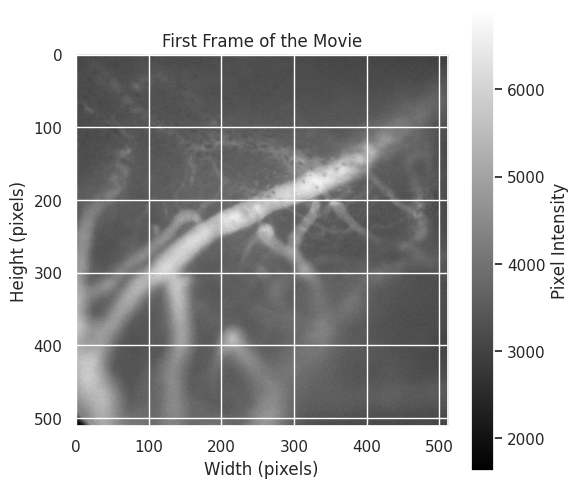

In [3]:
# Access the ImageSeries data
movies_data = nwb.acquisition['Movies'].data

# Get the shape of the data (frames, height, width)
num_frames, height, width = movies_data.shape
print(f"Movies data shape: {movies_data.shape}")
print(f"Movies data dtype: {movies_data.dtype}")
print(f"Movies data rate: {nwb.acquisition['Movies'].rate} Hz")

# Load a subset of frames (e.g., the first 100 frames)
# It's important to load only a subset for large datasets
subset_frames = movies_data[:100, :, :]

# Visualize the first frame
plt.figure(figsize=(6, 6))
plt.imshow(subset_frames[0, :, :], cmap='gray')
plt.title('First Frame of the Movie')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.colorbar(label='Pixel Intensity')
plt.show()

## Visualize Maximum Projection of a Few Frames

We can also compute and visualize a maximum projection across a few frames to highlight features that are present across different time points.


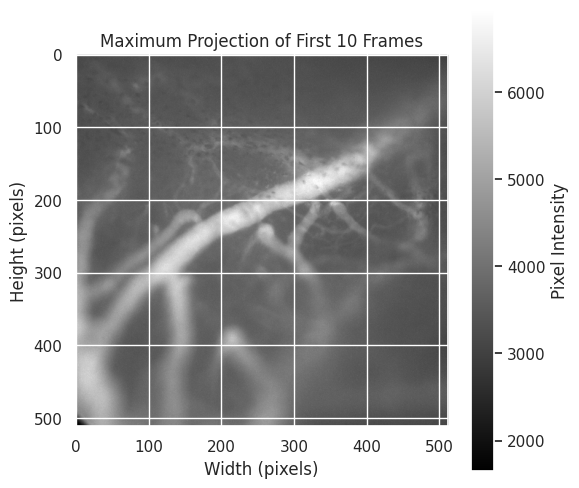

In [4]:
# Compute maximum projection over the first 10 frames
max_projection = np.max(subset_frames[:10, :, :], axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(max_projection, cmap='gray')
plt.title('Maximum Projection of First 10 Frames')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.colorbar(label='Pixel Intensity')
plt.show()

## Time Series of Pixel Intensity

We can extract the pixel intensity of a specific location over time from the movie data.


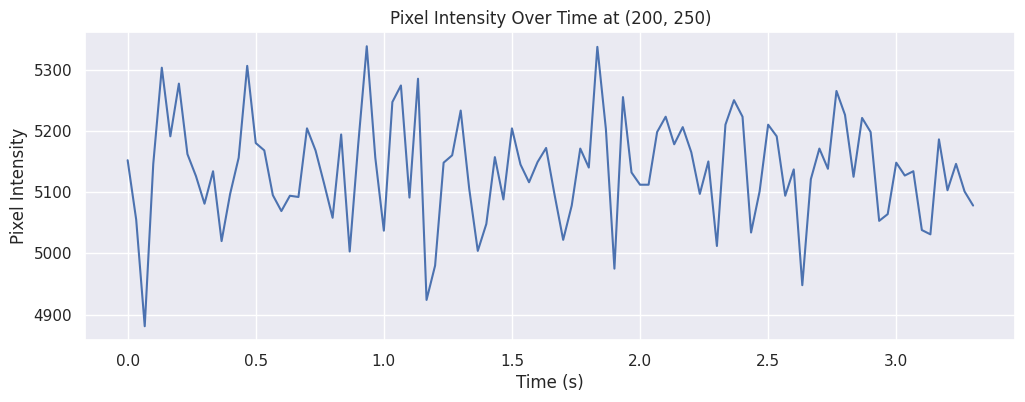

In [5]:
# Select a pixel location (e.g., row 200, column 250)
pixel_row = 200
pixel_col = 250

# Extract the time series for this pixel
pixel_timeseries = subset_frames[:, pixel_row, pixel_col]

# Get the timestamps for the subset of frames
# Assuming a constant frame rate, we can generate timestamps
sampling_rate = nwb.acquisition['Movies'].rate
timestamps = np.arange(subset_frames.shape[0]) / sampling_rate

plt.figure(figsize=(12, 4))
plt.plot(timestamps, pixel_timeseries)
plt.title(f'Pixel Intensity Over Time at ({pixel_row}, {pixel_col})')
plt.xlabel('Time (s)')
plt.ylabel('Pixel Intensity')
plt.grid(True)
plt.show()

## Summary and Future Directions

This notebook demonstrated how to access and perform basic visualization on the imaging data within this Dandiset using the Dandi API and PyNWB. We loaded a movie, visualized individual frames, computed a maximum projection, and plotted a time-series of pixel intensity.

Future analysis could involve:
- Implementing vessel diameter quantification methods described in the associated publication.
- Analyzing vessel pulsatility over time.
- Comparing the quantitative measurements across different experimental conditions or subjects (if available in other files).
- Integrating with other neurophysiology analysis tools for more advanced processing.